<a href="https://colab.research.google.com/github/Zander073/Logistic-Regression-from-Scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# **Logistic Regression Summary**

Logistic regression is a probabilistic based classification model. The model determines some probability of an input being some class and assigns the class based on its relative probability of being in that class. It is typically used for binary classification (meaning only two possible labels like $0$ or $1$) but it can be used for multi-label classification.

# **Probabilistic Classification**

Given two possible classifications $0$ and $1$, the logistic regression model will assign some input $x$ to a label $y$ as either $0$ or $1$ given a stated probabilistic threshold:

$
y=\begin{Bmatrix}
1, & P(y=1|x, \theta)) > 0.5\\ 
0, & Otherwise
\end{Bmatrix}
$

Where $\theta$ are the parameters of the model. This includes the learned set of weights ($w$) and bias ($b$). 

Basically, if the input $x$ has a probability greater than $0.5$ of being part of the class $1$, assign the input $x$ as $1$. Otherwise, assign the input  $x$ as $0$. 

*It is important to note that the model's probabilistic output is contingent on the model's learned parameters ($\theta$).*

# **The Variables**
Our model has the following variables: $X$, $y$, $\hat{y}$, $w$, $b$, and $z$


# **$X$**:

The goal of our model is to learn some set of weights for a set of $n$ features. Thus, when we train the model, we will use a matrix, $X$, with $n$ features and $m$ examples ($m$ x $n$).

$
X=\begin{bmatrix}
x_{0_{0}} & ... & x_{n-1_{0}} \\ 
... & ... & ... \\ 
x_{0_{m-1}} & ...  & x_{n-1_{m-1}} 
\end{bmatrix}
$ 

Each row $X_k$ has $n$ variables denoted as $x_{j_{k}}$ where $j$ represents the $nth$ feature and $k$ represents the row that variable is in. $j:0\leq j< n$ and $k: 0 \leq k < m $

# **$y$**:

For each row in $X$, there is a label $y$ such that $f(X_{i})=y_i$. The groundtruth of each example is denoted as $y$. For a binary classification framework, $y$ will be $0$ or $1$. However, $y$ may be more than one label if you choose to use the multiclass logistic regression framework.

# **$\hat{y}$**:

Since our model is attempting to assign some label to a given input, the output of the model is called a hypothesis since the label does not have a $100$% chance of being the predicted label. Hence, we denote the model's predicted value as $\hat{y}$.

# **$w$**:

The number of weights our model will have is equal to the number of features ($n$) in our training set $X$. The shape of our weight vector is thus 
($1$ x $n$). Since the number of weights is equal to the number of features, each weight signifies the importance of each feature. These are either initialized as zeros or random (typically zeros).

$
w=\begin{bmatrix}
w_0 & ... & w_{n-1}
\end{bmatrix}
$

# **$b$**:
Because we want to create a boundary between our linearly seperable data (assuming that our data is linearly seperable), we use the bias value to shift our bondary in the negative or positive direction during training. The bias of our model is denoted as $b$.

# **$z$**:
The $z$ variable is going to represent that dot product between the transpose of our weights $w^{T}$ and our input $X$ plus the bias $b$: 

$z=(w^{T}\cdot X)+b$

$
z=\begin{bmatrix}
w_0\\ 
...\\ 
w_{n-1}
\end{bmatrix}\cdot \begin{bmatrix}
x_{0_{0}} & ... & x_{n-1_{0}} \\ 
... & ... & ... \\ 
x_{0_{m-1}} & ...  & x_{n-1_{m-1}} 
\end{bmatrix}+ b
$

This dot product computation is okay because the number of rows in our first matrix $w^{T}$ is equal to the number of columns in our second matrix $X$.

# **The Sigmoid Function**
When we give our model some input $X$, it is going to output some probability $\hat{y}$ such that: $0.0 < \hat{y} < 1.0$. Our model does this by using a mathematical function known as the sigmoid ($σ(z)$). 

For any given input, $z$, the sigmoid function ensures that the output will be from $0.0$ to $1.0$ where $z$ can be any real number such that: $-∞<z<∞$.

The sigmoid function is denoted as: $σ(z)=\frac{1}{1+e^{-z}}$

You can see that the sigmoid produces a value only between $0$ and $1$ for any infinitely large positive or negative number $z$ from the following limits:

$\lim_{z \to ∞} σ(z) = 1$

$\lim_{z \to -∞} σ(z) = 0$

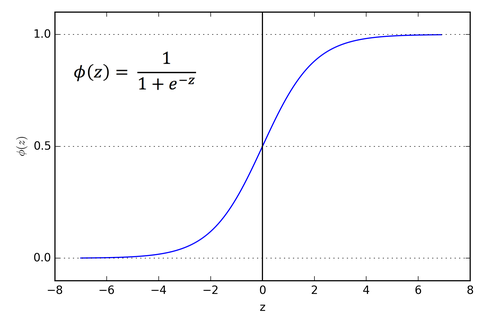

The output of our sigmoid function is used in both training and for general prediction post-training to determine labels.

In [2]:
# Sigmoid function
def sigmoid(w, b, X):
  """
  w: Numpy array of weights with size (n x 1)
  b: Bias scalar as a real number
  X: Numpy array of inputs with size (m x n)

  returns: The sigmoid output ranging from zero
  """
  z = np.dot(X, w.T) + b
  sigmoid = 1 / (1 + np.exp(-z))
  return sigmoid

# **Training the Model**


Because our model produces a hypothesis $\hat{y}$, to improve our model's accuracy, we have compute the loss between our hypothesis and the groundtruth value $y$. This is known as the Binary Cross Entropy Loss function (also known as the log-loss function): $J(\theta)=J(w,b)=L(\hat{y}, y)$

Where $L(\hat{y}, y) = \frac{-1}{m}\sum_{i=1}^{m}[(y^{(i)})log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$

The outout of the loss is a simple average of the differences between each hypothesis and its relative groundtruth value.

In [3]:
# Log-loss function:
def log_loss(y_hat, y):
  """
  y_hat: Model's estimated label (m x 1)
  y: Groundtruth label (m x 1)

  returns: Loss between y_hat and y
  """
  loss = -np.mean(y * (np.log(y_hat)) - (1 - y) * np.log(1 - y_hat))
  return loss

# **Gradient Descent**

To actually utilize the loss function to improve our model's parameters, we have to use the *Gradient Descent algorith*m. Since the Loss function is a three dimensional convex function, we can take the partial derivative of our loss function, $J(w,b)$ with respect to $w$ and with respect to $b$. Using these partial derivatives, we can step towards the optimal set of parameters. 

Through the code, we update each weight simultaneously via vectorization. However, it is easier to understand what is happening if you just examine updating ***one*** parameter such as $w_1$. The graph of the 2d loss function is a convex-like figure. 

***Remember, the ultimate goal is to minimize the loss by finding the optimal weight. ***

Because we don't know the exact value of this convex, we can step towards the bottom of the convex to find the optimal weight value. We'll know we have our optimal weight value if our next step is higher than the previous (given that we used a proper value for the learning rate $α$). 

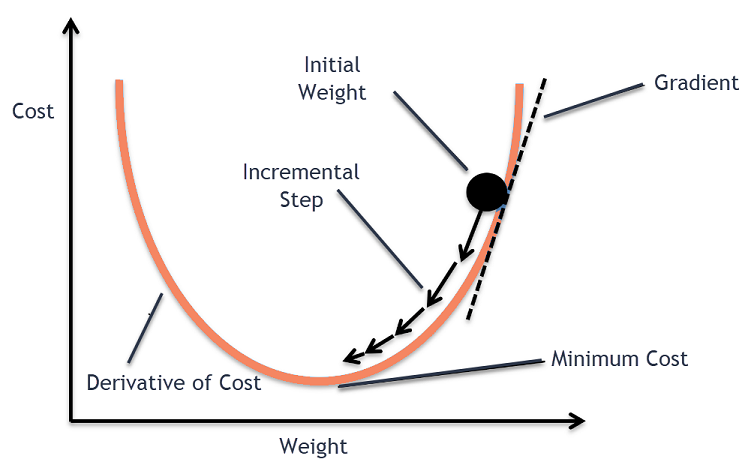

Image credit: https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/

We want the partial derivative of our parameters. Our model uses two parameters $w$ and $b$ so, we need the partial derivative of the log-loss function with respect to each of these ($dw$ and $db$). After taking each respective partial derivative, you're left with:

$dw=\frac{1}{m}\sum_{i=1}^{m}((\hat{y}^{(i)}-y^{(i)}) * x^{(i)})$

$db=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})$ 

For a detailed proof on each of these partial derivatives, visit: https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

In [4]:
# Gradient function, computes the partial derviative of J(w,b) with respect to w and b
def gradients(X, y_hat, y):
  """
  X: Example input to estimate (m x n)
  y_hat: Prediction vector (m x 1)
  y: Groundtruth vector (m x 1)

  returns: Tuple with both gradients dw (m x 1) and db
  """
  m = X.shape[0]
  dw = (1 / m) * np.dot((y_hat - y).T, X)
  db = (1 / m) * np.sum((y_hat - y))
  return dw, db

# **Weight Update Rule**

With each step in gradient descent, we get a new paramater value to update. The update rule is very simple:

$w=w-\alpha*dw$

$b=b-\alpha*db$

The idea is that with each update of our parameters, we get closer to minimzing the loss, $L(\hat{y}, y)$.

In [5]:
# Parameter update rule:
def update_params(w, b, dw, db, alpha):
  """
  w: Weight vector (1 x n)
  b: Bias scalar represetned as a real number
  dw: PD of loss w/ respect to w (1 x n)
  db: PD of loss w/ respect to b
  alpha: Learning rate

  returns: Tuple of new w (1 x n) and b
  """
  w = w - (alpha * dw)
  b = b - (alpha * db)
  return w, b

# **Main Training Loop**
The main training loop iterates for a given number of epochs. An epoch is one iteration of a training loop. To make things more simple, we update the weights and bias for every given training example at once using matrix operations. If we have a training example $X$ that has a size ($m$ x $n$), when we compute the model's initial prediction $\hat{y}$, the output of the sigmoid function is a vector of the size ($1$ x $m$). In simpler terms, there is a prediction for each example in $X$; $m$ examples yields $m$ predictions.

The algorithm works like this:


1.   Get training input size  $n$
2.   Initialize parameters: set $w$ and $b$ to be zeros
3.   Initialize loss history
4.   For epoch in range of total epochs:
    
        1. Get current prediction: $\hat{y}=sigmoid(w, b, X)$ 
        2. Compute gradients: $dw, db = gradients(X, \hat{y}, y)$
        3. Update parameters: $w, b = update(w, b, dw, db, \alpha)$
        4. Compute log-loss: $L(\hat{y}, y) = loss(\hat{y}, y)$
        5. Append log-loss to loss history 
5. Return $w$, $b$, and loss history

In [6]:
# Main gradient descent training loop:
def train_gd(X, y, alpha, epochs):
  """
  X: Training examples (m x n)
  y: Groundtruth labels (m x 1)
  alpha: Learning rate

  returns: Optimal parameters; weights (1 x n), bias, and  loss history
  """
  m,n = X.shape
  w = np.zeros((1, n))
  b = 0
  loss_history = []
  for epoch in range(epochs):
    y_hat = sigmoid(w, b, X)
    dw, db = gradients(X, y_hat, y)
    w, b = update_params(w, b, dw, db, alpha)
    loss = log_loss(y_hat, y)
    loss_history.append(loss)
  return w, b, loss_history

# **Prediction**
Once our model's parameters have been trained and are optimal, its time to make some predictions of unseen examples! Remember, when we pass an input into our model, the sigmoid function won't return exactly $0$ or $1$. If the model has been trained well, the output of the sigmoid function should be close to but not exactly $0$ or $1$ since that would require an infinitely large positive or negative number (reference the sigmoid function section above).

To get a prediction of an input, we need the trained parameters ($w$ and $b$) and a simply defined sigmoid function. Passing the trained parameters and the input through the sigmoid function will return some probability value between $0$ and $1$. To label ($y$) our input we use the following rule:

$
y=\begin{Bmatrix}
1, & P(y=1|x, \theta)) > 0.5\\ 
0, & Otherwise
\end{Bmatrix}
$

If the computed probability is greater than $0.5$, label the input as a $1$ and label it $0$ otherwise.

In [7]:
# Returns the model's predicted labels for a given input X:
def predict(w, b, X):
  """
  w: Weight vector (1 x n)
  b: Bias value
  X: Input to predict (m x n)

  returns: A vector of predicted labels (m x 1)
  """

  predictions = sigmoid(w, b, X)
  predicted_labels = [1 if i > 0.5 else 0 for i in predictions]
  return predicted_labels

# **Helper Methods**

These two methods are used to compute the accuracy of the model's predictions and to normalize the data. Normalization is necessary to get all of the data on the same scale. This makes the convergence process a lot easier and does not hinder the accuracy of the model. 

In [8]:
# Computes the accuracy of the model:
def accuracy(y, y_hat):
    """
    y: Groundtruth label vector (m x 1)
    y_hat: Predicted label vector (m x 1)

    returns: Average correct score for predicted labels
    """
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

# Normalize data via Z-normalization to make model convergence easier
def normalize(X):
  """
  X: Example matrix input to normalize (m x n)

  returns: Normalized X matrix (m x n)
  """
  m, n= X.shape
  for i in range(n):
    X = (X - X.mean(axis=0))/X.std(axis=0)
  return X

# **Example**

For this example we will attempt to train our model to detect credit card fraud. Our labeled dataset has 30 features and about 172k examples. Luckily, the matrix operations makes training a lot faster than going through each exmaple iteratively. 

In [9]:
# Reading in data file:
data = pd.read_csv("/creditcard.csv")

# Seperating examples from their features (X) and labels (y):
y = data.Class
X = data
X.drop(columns=data.columns[-1],  axis=1,  inplace=True)

# Normalizing feature data:
X = normalize(X)

# Splitting up X and y into training and testing data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Making 1D training labels into a 2D array but with only one row:
y_train = y_train[:,np.newaxis]

<ipython-input-9-208e6fabf0ab>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:,np.newaxis]


In [10]:
# Training the model's parameters w and b via gradient descent:
w, b, loss_history = train_gd(X_train, y_train, alpha=0.015, epochs=500)

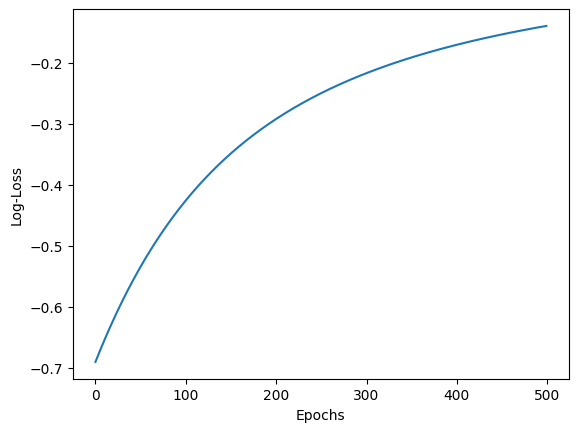

In [11]:
# Plotting log-loss change with respect to training iterations:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Log-Loss")
plt.show()

In [12]:
# Getting predictions for the test set X_test with our now trained parameters w and b:
test_predictions = predict(w, b, X_test)

In [13]:
# A simple score of correctly predicted labels over total possible labels:
score = accuracy(y_test, test_predictions)
print("Accuracy: ", score)

Accuracy:  0.998934962489613


# **Conclusion**
The trained model had an accuracy of approximately $99.89$%. Meaning, the model is able to predict credit card fraud correctly about $99$% of the time. This is a very good score which indicates the data is linearly seperable. 

This model can be used for any kind of labeled dataset. Just be sure to quantify your features as some features are strings like country name, gender, mood, etc.. If you've done this correctly and your model isn't converging towards an optimal set of parameters, try adjusting the learning step alpha ($α$) and try changing the number of epochs. 

Thanks for checking out my example. I hope this helped you understand logistic regression!